In [1]:
import read_data as rd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ultranest
import corner

In [2]:
# Read the data from the file
file_path = 'Land_and_Ocean_summary.txt' 
df = rd.read_land_ocean_data(file_path)
df = df[['Year', 'Annual_Anomaly', 'Annual_Unc']]


print(f"There are {len(df)} rows in the DataFrame.")
print("Here are the first few rows:")
print(df.head())  # Display the first few rows

There are 174 rows in the DataFrame.
Here are the first few rows:
   Year  Annual_Anomaly  Annual_Unc
0  1851          -0.321       0.259
1  1852          -0.292       0.249
2  1853          -0.295       0.196
3  1854          -0.283       0.130
4  1855          -0.278       0.120


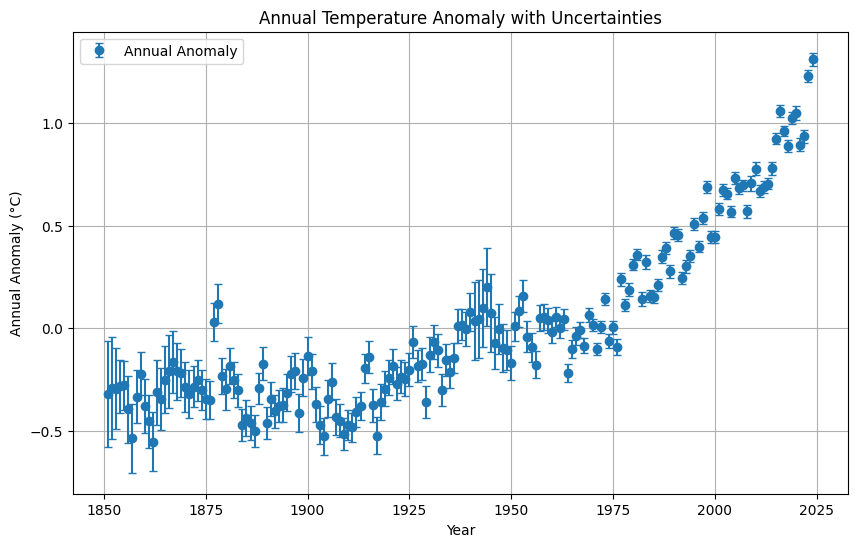

In [3]:
# plot the annual_anomaly with the uncertainties against the years

plt.figure(figsize=(10, 6))
plt.errorbar(df['Year'], df['Annual_Anomaly'], yerr=df['Annual_Unc'], fmt='o', capsize=3, label='Annual Anomaly')
plt.xlabel('Year')
plt.ylabel('Annual Anomaly (°C)')
plt.title('Annual Temperature Anomaly with Uncertainties')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from scipy.stats import norm
param_names = ['constant']
# the prior transform function
def prior_transform(cube):
    # Transform the unit uniform cube to the prior distribution
    prior_min = -2.0
    prior_max = 2.0
    return prior_min + (prior_max - prior_min) * cube

# Define the log-likelihood function
def log_likelihood(params):
    constant = params[0]
    return np.sum(norm.logpdf(df["Annual_Anomaly"], loc=constant, scale=df["Annual_Unc"]))

# Set up the ultranest sampler
sampler = ultranest.ReactiveNestedSampler(
    param_names, log_likelihood, prior_transform
)

# Run the sampler
results = sampler.run(min_num_live_points=400)

# Plot the results
sampler.print_results()
sampler.plot_corner()

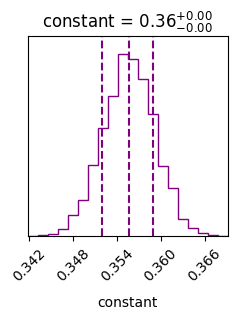

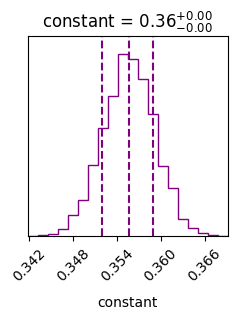

In [6]:
from ultranest.plot import cornerplot
cornerplot(results)

In [ ]:
import corner

# Extract the samples from the results
samples = results['weighted_samples']['points']

# Create a corner plot
figure = corner.corner(
    samples,
    labels=param_names,
    show_titles=True,
    title_fmt=".2f",
    quantiles=[0.16, 0.5, 0.84],
    title_kwargs={"fontsize": 12}
)

plt.show()